<h1><center> ROINFORCEMENT LEARNING FOR STOCK TRADING </center></h1>
<h2><center> Q-LEARN MODELS </center></h2>

## 1. SOURCES

#### A CURATED LIST OF ML FOR FINANCE APPLICATIONS

https://github.com/firmai/financial-machine-learning

#### APPLICATIONS FROM THE COLLABORATIVE PLATFORM BY GOOGLE

https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW

#### SEQUENCE FOR LEARNING TO BUILD A REINFORCEMENT LEARNING MODEL WITH TENSORFLOW

https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

## 2. CREATING THE DATA FILE

In [1]:
## Further  recommendation, test multiple frameworks, see what works better on average. 
## Open source RL: https://docs.google.com/spreadsheets/d/1EeFPd-XIQ3mq_9snTlAZSsFY7Hbnmd7P5bbT8LPuMn0/edit#gid=0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
df_full = pdr.get_data_yahoo("JPM", start="2000-01-01").reset_index()
df_full.to_csv('JPM.csv',index=False)
df_full.head()


D:\Program Files\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.681709
1,2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,26.170267
2,2000-01-05,48.375000,46.000000,46.833332,46.958332,8714500.0,26.008717
3,2000-01-06,48.625000,46.500000,46.750000,47.625000,8369200.0,26.377962
4,2000-01-07,49.000000,47.333332,48.416668,48.500000,6571900.0,26.862602


In [3]:
df_full = pd.read_csv('JPM.csv')

## 3. Q-LEARNING 

### Q-LEARNING IN THE CONTEXT OF REINFORCEMENT LEARNING

Q-learning is a model-free reinforcement learning algorithm. 

The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. It does not require a model (hence the connotation "model-free") of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations.

For any finite Markov decision process (FMDP), Q-learning finds a policy that is optimal in the sense that it maximizes the expected value of the total reward over any and all successive steps, starting from the current state. Q-learning can identify an optimal action-selection policy for any given FMDP, given infinite exploration time and a partly-random policy.

"Q" names the function that returns the reward used to provide the reinforcement and can be said to stand for the "quality" of an action taken in a given state.

Reinforcement learning involves an agent, a set of states $S$, and a set $A$ of actions per state. By performing an action $a$ $\in$ $A$, the agent transitions from state to state. Executing an action in a specific state provides the agent with a reward (a numerical score).

The goal of the agent is to maximize its total (future) reward. It does this by adding the maximum reward attainable from future states to the reward for achieving its current state, effectively influencing the current action by the potential future reward. This potential reward is a weighted sum of the expected values of the rewards of all future steps starting from the current state.

As an example, consider the process of boarding a train, in which the reward is measured by the negative of the total time spent boarding (alternatively, the cost of boarding the train is equal to the boarding time). One strategy is to enter the train door as soon as they open, minimizing the initial wait time for yourself. If the train is crowded, however, then you will have a slow entry after the initial action of entering the door as people are fighting you to depart the train as you attempt to board. The total boarding time, or cost, is then:

0 seconds wait time + 15 seconds fight time

On the next day, by random chance (exploration), you decide to wait and let other people depart first. This initially results in a longer wait time. However, time fighting other passengers is less. Overall, this path has a higher reward than that of the previous day, since the total boarding time is now:

5 second wait time + 0 second fight time.

Through exploration, despite the initial (patient) action resulting in a larger cost (or negative reward) than in the forceful strategy, the overall cost is lower, thus revealing a more rewarding strategy



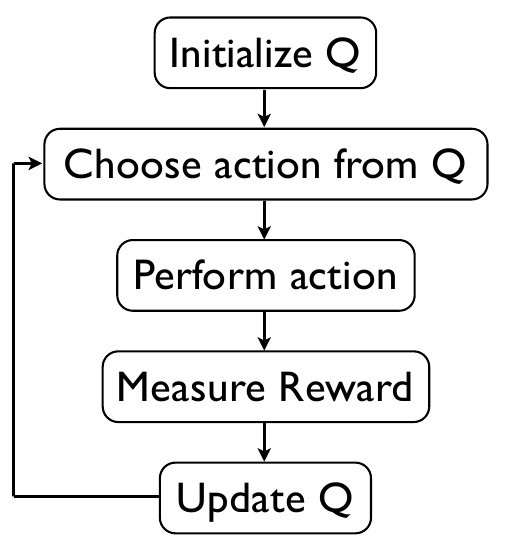

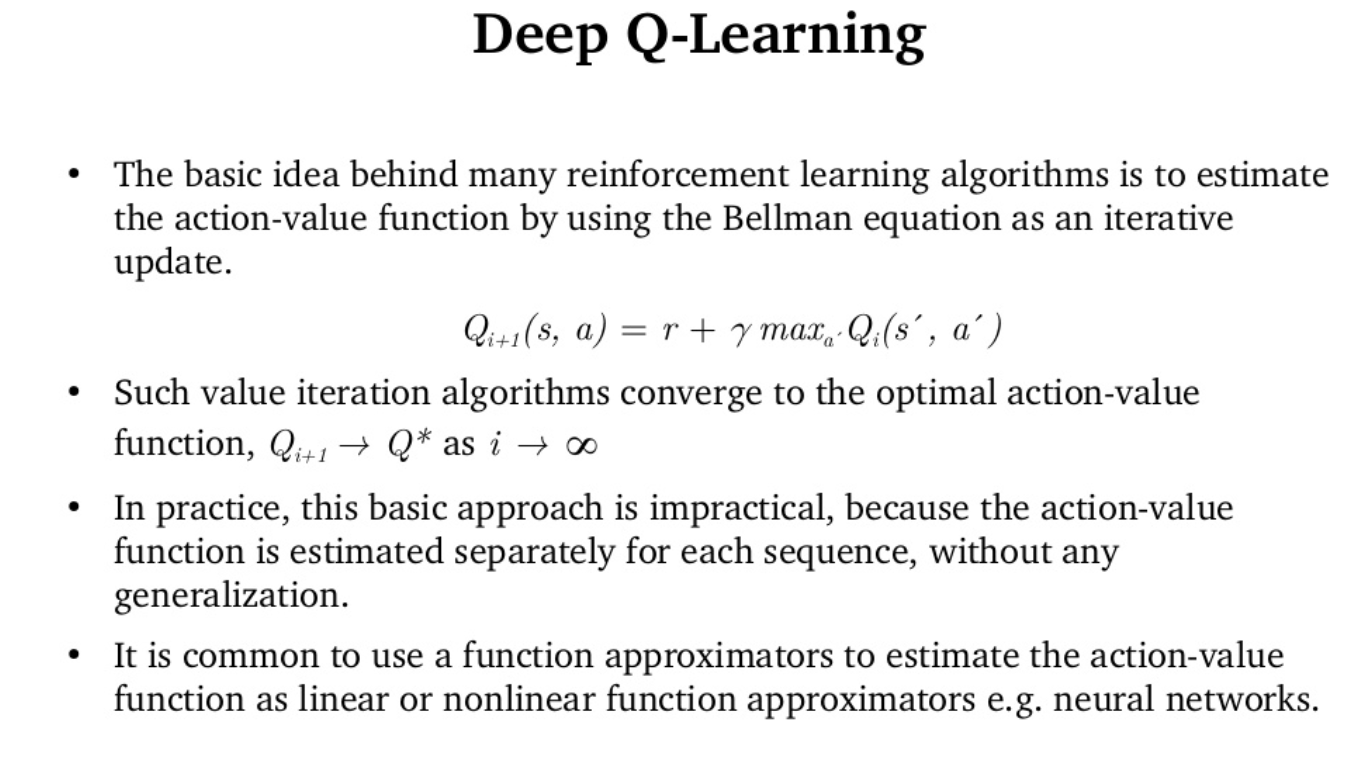


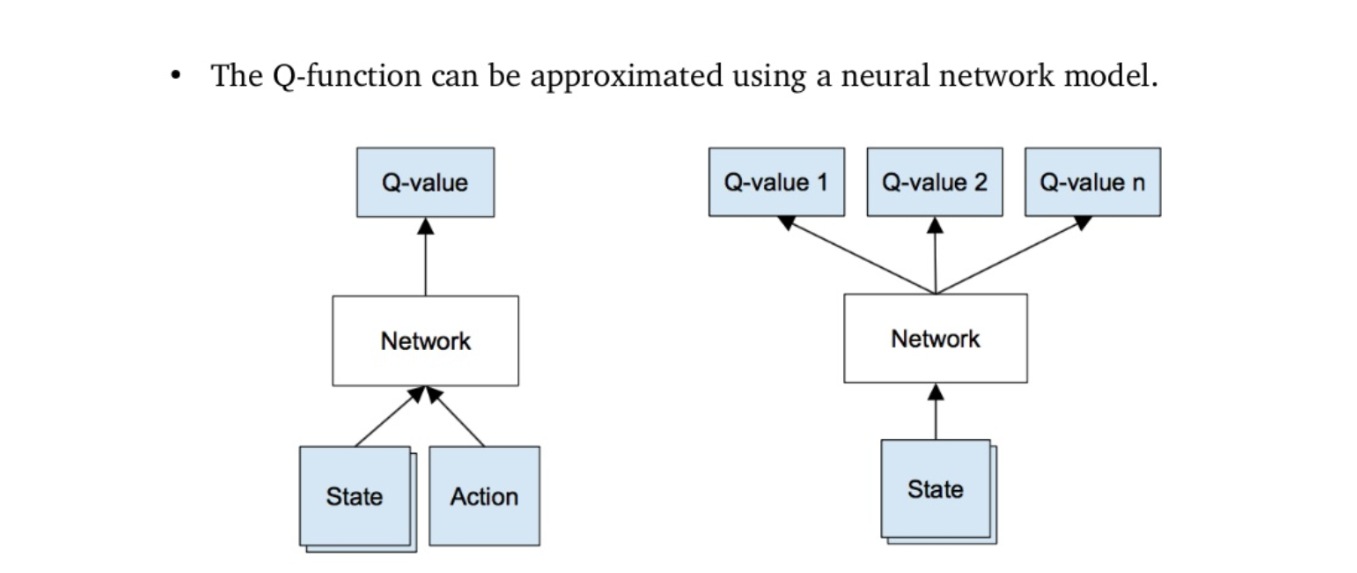

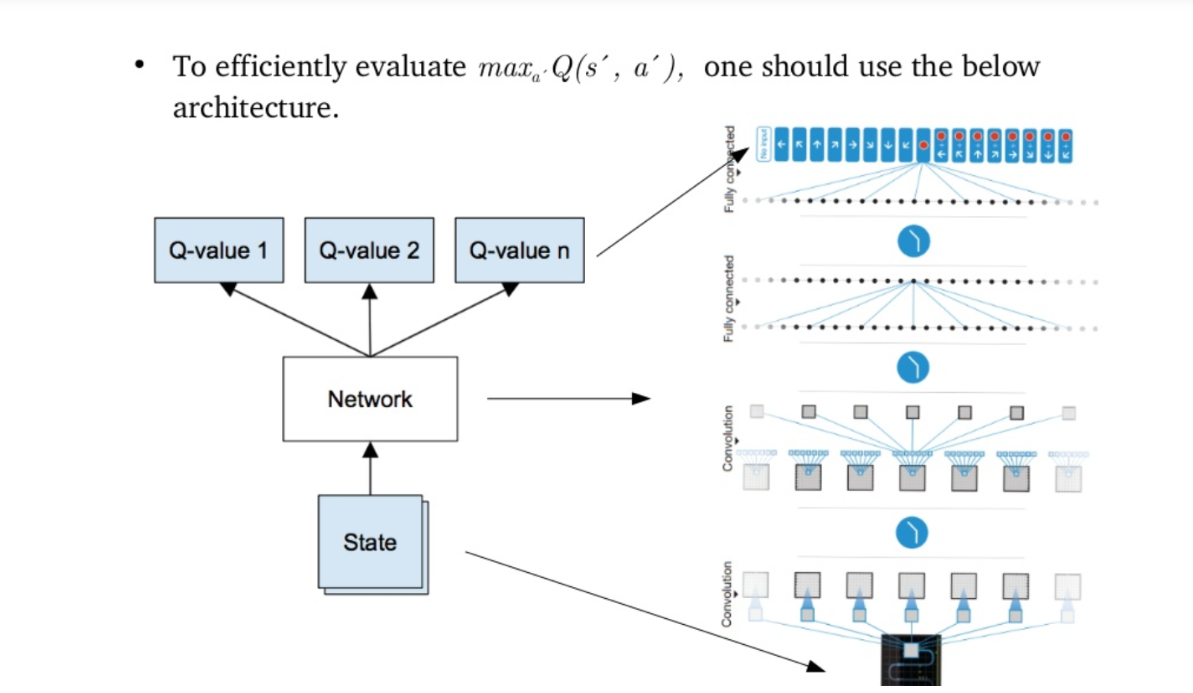

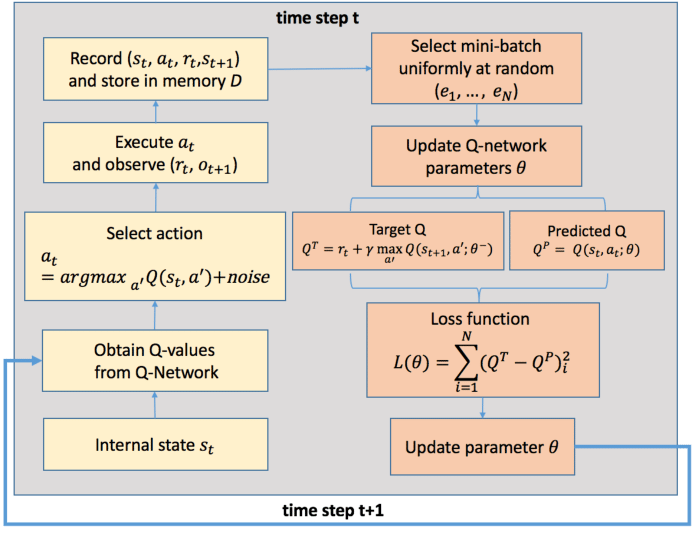

### APPLICATIONS TO AUTONOMOUS DRIVING AUTOMOBILES


https://www.researchgate.net/publication/319534449_Formulation_of_Deep_Reinforcement_Learning_Architecture_Toward_Autonomous_Driving_for_On-Ramp_Merge

Multiple automakers have in development or in production automated driving systems (ADS) that offer freeway-pilot functions. This type of ADS is typically limited to restricted-access freeways only, that is, the transition from manual to automated modes takes place only after the ramp merging process is completed manually. 

One major challenge to extend the automation to ramp merging is that the automated vehicle needs to incorporate and optimize long-term objectives (e.g. successful and smooth merge) when near-term actions must be safely executed. Moreover, the merging process involves interactions with other vehicles whose behaviors are sometimes hard to predict but may influence the merging vehicle optimal actions. 

To tackle such a complicated control problem, we propose to apply Deep Reinforcement Learning (DRL) techniques for finding an optimal driving policy by maximizing the long-term reward in an interactive environment. Specifically, we apply a Long Short-Term Memory (LSTM) architecture to model the interactive environment, from which an internal state containing historical driving information is conveyed to a Deep Q-Network (DQN). 

The DQN is used to approximate the Q-function, which takes the internal state as input and generates Q-values as output for action selection. With this DRL architecture, the historical impact of interactive environment on the long-term reward can be captured and taken into account for deciding the optimal control policy. The proposed architecture has the potential to be extended and applied to other autonomous driving scenarios such as driving through a complex intersection or changing lanes under varying traffic flow conditions.

### THE Q-LEARNING TRANSITION  FUNCTION

The weight for a step from a state $\Delta$ t steps into the future is calculated as $ \gamma$ $^(\Delta t)$, where $\gamma$  (the discount factor) is a number between 0 and 1 $0\leq \gamma \leq 1$ and has the effect of valuing rewards received earlier higher than those received later (reflecting the value of a "good start"). $\Delta t$.

The algorithm, therefore, has a function that calculates the quality of a state-action combination:

$Q:S\times A\to \mathbb  {R}$ .


Before learning begins, $Q$ is initialized to a possibly arbitrary fixed value (chosen by the programmer). Then, at each time $t$ the agent selects an action $a_{t}$, observes a reward $r_{t}$, enters a new state $s_{t+1}$ (that may depend on both the previous state $s_{t}$ and the selected action), and $Q$ is updated. The core of the algorithm is a simple value iteration update, using the weighted average of the old value and the new information:

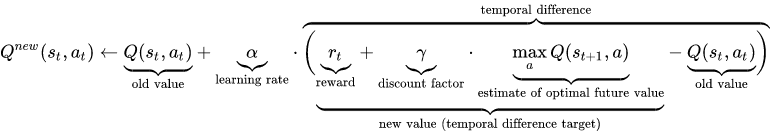

where {\displaystyle r_{t}}{\displaystyle r_{t}} is the reward received when moving from the state {\displaystyle s_{t}}s_{{t}} to the state {\displaystyle s_{t+1}}s_{t+1}, and {\displaystyle \alpha }\alpha  is the learning rate ({\displaystyle 0<\alpha \leq 1}0<\alpha \leq 1).

An episode of the algorithm ends when state {\displaystyle s_{t+1}}s_{t+1} is a final or terminal state. However, Q-learning can also learn in non-episodic tasks.[citation needed] If the discount factor is lower than 1, the action values are finite even if the problem can contain infinite loops.

For all final states $s_{f}$, $Q(s_{f},a)$ is never updated, but is set to the reward value $r$ observed for state $s_{f}$. In most cases, $Q(s_{f},a)$ can be taken to equal zero.

### PARAMETERS

**Learning Rate**

The learning rate or step size determines to what extent newly acquired information overrides old information. A factor of 0 makes the agent learn nothing (exclusively exploiting prior knowledge), while a factor of 1 makes the agent consider only the most recent information (ignoring prior knowledge to explore possibilities). 

In fully deterministic environments, a learning rate of $\alpha _{t}=1$ is optimal. When the problem is stochastic, the algorithm converges under some technical conditions on the learning rate that require it to decrease to zero. 

In practice, often a constant learning rate is used, such as $\alpha _{t}=0.1$ for all $t$.

**Discount factor**

The discount factor $\gamma$  determines the importance of future rewards. A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, i.e. $r_{t}$ (in the update rule above), while a factor approaching 1 will make it strive for a long-term high reward. If the discount factor meets or exceeds 1, the action values may diverge. , Q-function learning leads to propagation of errors and instabilities when the value function is approximated with an artificial neural network. In that case, starting with a lower discount factor and increasing it towards its final value accelerates learning.

**Initial conditions**


Since Q-learning is an iterative algorithm, it implicitly assumes an initial condition before the first update occurs. High initial values, also known as "optimistic initial conditions", can encourage exploration: no matter what action is selected, the update rule will cause it to have lower values than the other alternative, thus increasing their choice probability. The first reward $r$ can be used to reset the initial conditions. According to this idea, the first time an action is taken the reward is used to set the value of $Q$. This allows immediate learning in case of fixed deterministic rewards. A model that incorporates reset of initial conditions (RIC) is expected to predict participants' behavior better than a model that assumes any arbitrary initial condition (AIC).RIC seems to be consistent with human behaviour in repeated binary choice experiments.

## 4. A Q-LEARNING AGENT

In [4]:
## Q-learning agent

from collections import deque
import random

df= df_full.copy()
name = 'Q-learning agent'

class Agent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []

        self.gamma = 0.95
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999

        tf.reset_default_graph()
        self.sess = tf.InteractiveSession()
        self.X = tf.placeholder(tf.float32, [None, self.state_size])
        self.Y = tf.placeholder(tf.float32, [None, self.action_size])
        feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed, self.action_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(1e-5).minimize(
            self.cost
        )
        self.sess.run(tf.global_variables_initializer())

    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                target[action] += self.gamma * np.amax(Q_new[i])
            X[i] = state
            Y[i] = target
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest, 
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 100, checkpoint = 10, initial_money = initial_money)

states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)



Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
epoch: 10, total rewards: 3034.589762.3, cost: 0.058669, total money: 4765.469774
epoch: 20, total rewards: -101.584194.3, cost: 0.034536, total money: 8798.355824
epoch: 30, total rewards: -100.465050.3, cost: 0.034541, total money: 8528.484978
epoch: 40, total rewards: -94.791691.3, cost: 0.026712, total money: 9631.948315
epoch: 50, total rewards: -94.085041.3, cost: 0.038765, total money: 9769.374966
epoch: 60, total rewards: -38.325031.3, cost: 0.021529, total money: 9961.674969
epoch: 70, total rewards: 2.327429.3, cost: 0.020077, total money: 10002.327429
epoch: 80, total rewards: 11.134966.3, cost: 0.018705, total money: 10011.134966
epoch: 90, total rewards: -4.980059.3, cost: 0.017640, total money: 9995.019941
epoch: 100, total rewards: -58.688341.3, cost: 0.017114, total money: 9941.311659
day 16: buy 1 unit at price 52.291668, total balance 9947.

day 651, sell 1 unit at price 26.379999, investment 11.543339 %, total balance 9960.149998,
day 660: buy 1 unit at price 26.879999, total balance 9933.269999
day 662, sell 1 unit at price 25.709999, investment -4.352679 %, total balance 9958.979998,
day 670: buy 1 unit at price 24.100000, total balance 9934.879997
day 672, sell 1 unit at price 23.590000, investment -2.116183 %, total balance 9958.469997,
day 678: buy 1 unit at price 21.549999, total balance 9936.919998
day 679, sell 1 unit at price 20.440001, investment -5.150806 %, total balance 9957.359999,
day 707: buy 1 unit at price 21.250000, total balance 9936.109999
day 714, sell 1 unit at price 22.059999, investment 3.811762 %, total balance 9958.169998,
day 715: buy 1 unit at price 20.600000, total balance 9937.569998
day 716, sell 1 unit at price 20.200001, investment -1.941746 %, total balance 9957.769999,
day 722: buy 1 unit at price 21.889999, total balance 9935.879999
day 725: buy 1 unit at price 24.889999, total balance

day 1206: buy 1 unit at price 37.700001, total balance 9929.990004
day 1207, sell 1 unit at price 37.470001, investment -0.610078 %, total balance 9967.460005,
day 1226: buy 1 unit at price 37.820000, total balance 9929.640005
day 1227, sell 1 unit at price 37.419998, investment -1.057646 %, total balance 9967.060003,
day 1238: buy 1 unit at price 37.810001, total balance 9929.250002
day 1239: buy 1 unit at price 37.549999, total balance 9891.700003
day 1240, sell 1 unit at price 37.689999, investment -0.317384 %, total balance 9929.390001,
day 1241, sell 1 unit at price 37.630001, investment 0.213054 %, total balance 9967.020002,
day 1267: buy 1 unit at price 37.840000, total balance 9929.180002
day 1268, sell 1 unit at price 37.250000, investment -1.559197 %, total balance 9966.430002,
day 1275: buy 1 unit at price 37.330002, total balance 9929.100000
day 1277, sell 1 unit at price 37.520000, investment 0.508970 %, total balance 9966.620001,
day 1298: buy 1 unit at price 37.509998, t

day 1812: buy 1 unit at price 49.049999, total balance 9926.590006
day 1814, sell 1 unit at price 48.520000, investment -1.080528 %, total balance 9975.110006,
day 1821: buy 1 unit at price 48.560001, total balance 9926.550005
day 1822, sell 1 unit at price 48.560001, investment 0.000000 %, total balance 9975.110006,
day 1827: buy 1 unit at price 49.200001, total balance 9925.910006
day 1829, sell 1 unit at price 49.970001, investment 1.565042 %, total balance 9975.880007,
day 1834: buy 1 unit at price 52.279999, total balance 9923.600008
day 1835, sell 1 unit at price 52.160000, investment -0.229531 %, total balance 9975.760008,
day 1840: buy 1 unit at price 52.259998, total balance 9923.500010
day 1848, sell 1 unit at price 52.150002, investment -0.210480 %, total balance 9975.650011,
day 1851: buy 1 unit at price 52.980000, total balance 9922.670012
day 1853: buy 1 unit at price 52.540001, total balance 9870.130011
day 1854, sell 1 unit at price 52.560001, investment -0.792749 %, to

day 2493: buy 1 unit at price 42.220001, total balance 9903.449995
day 2495, sell 1 unit at price 41.400002, investment -1.942207 %, total balance 9944.849997,
day 2519: buy 1 unit at price 44.680000, total balance 9900.169996
day 2521, sell 1 unit at price 43.490002, investment -2.663381 %, total balance 9943.659998,
day 2529: buy 1 unit at price 39.209999, total balance 9904.449999
day 2537, sell 1 unit at price 38.349998, investment -2.193320 %, total balance 9942.799997,
day 2541: buy 1 unit at price 38.869999, total balance 9903.929998
day 2542, sell 1 unit at price 39.020000, investment 0.385906 %, total balance 9942.949999,
day 2545: buy 1 unit at price 40.040001, total balance 9902.909998
day 2546, sell 1 unit at price 40.410000, investment 0.924073 %, total balance 9943.319998,
day 2557: buy 1 unit at price 42.810001, total balance 9900.509996
day 2559, sell 1 unit at price 42.419998, investment -0.911010 %, total balance 9942.929995,
day 2561: buy 1 unit at price 43.180000, t

day 3171: buy 1 unit at price 36.919998, total balance 9813.950012
day 3174, sell 1 unit at price 37.099998, investment 0.487541 %, total balance 9851.050011,
day 3178: buy 1 unit at price 37.369999, total balance 9813.680012
day 3180, sell 1 unit at price 37.830002, investment 1.230942 %, total balance 9851.510014,
day 3187: buy 1 unit at price 37.139999, total balance 9814.370014
day 3188: buy 1 unit at price 37.009998, total balance 9777.360016
day 3190, sell 1 unit at price 38.689999, investment 4.173396 %, total balance 9816.050014,
day 3193, sell 1 unit at price 39.599998, investment 6.998109 %, total balance 9855.650013,
day 3194: buy 1 unit at price 39.919998, total balance 9815.730015
day 3196: buy 1 unit at price 41.570000, total balance 9774.160015
day 3198, sell 1 unit at price 41.259998, investment 3.356714 %, total balance 9815.420013,
day 3200: buy 1 unit at price 41.250000, total balance 9774.170013
day 3201, sell 1 unit at price 40.880001, investment -1.659848 %, total

day 3822: buy 1 unit at price 61.849998, total balance 9824.790051
day 3825, sell 1 unit at price 61.200001, investment -1.050926 %, total balance 9885.990051,
day 3828: buy 1 unit at price 60.459999, total balance 9825.530052
day 3829, sell 1 unit at price 59.610001, investment -1.405886 %, total balance 9885.140053,
day 3831: buy 1 unit at price 59.549999, total balance 9825.590054
day 3833, sell 1 unit at price 60.580002, investment 1.729643 %, total balance 9886.170055,
day 3837: buy 1 unit at price 60.849998, total balance 9825.320057
day 3839: buy 1 unit at price 61.470001, total balance 9763.850056
day 3845, sell 1 unit at price 62.840000, investment 3.270340 %, total balance 9826.690056,
day 3846: buy 1 unit at price 63.240002, total balance 9763.450054
day 3848, sell 1 unit at price 62.939999, investment 2.391406 %, total balance 9826.390053,
day 3856, sell 1 unit at price 64.720001, investment 2.340290 %, total balance 9891.110054,
day 3862: buy 1 unit at price 65.360001, tot

day 4473: buy 1 unit at price 95.989998, total balance 9796.040024
day 4478: buy 1 unit at price 98.110001, total balance 9697.930023
day 4479: buy 1 unit at price 99.510002, total balance 9598.420021
day 4480, sell 1 unit at price 99.339996, investment 3.489945 %, total balance 9697.760017,
day 4484: buy 1 unit at price 101.769997, total balance 9595.990021
day 4487, sell 1 unit at price 100.919998, investment 2.864130 %, total balance 9696.910019,
day 4488: buy 1 unit at price 101.589996, total balance 9595.320023
day 4489, sell 1 unit at price 101.410004, investment 1.909357 %, total balance 9696.730026,
day 4490, sell 1 unit at price 100.779999, investment -0.972780 %, total balance 9797.510025,
day 4493, sell 1 unit at price 97.629997, investment -3.898021 %, total balance 9895.140022,
day 4497: buy 1 unit at price 98.190002, total balance 9796.950020
day 4502: buy 1 unit at price 98.639999, total balance 9698.310020
day 4503, sell 1 unit at price 98.320000, investment 0.132394 %,

day 5053: buy 1 unit at price 135.289993, total balance 8765.449966
day 5057, sell 1 unit at price 137.740005, investment 4.538563 %, total balance 8903.189972,
day 5058, sell 1 unit at price 138.000000, investment 3.712613 %, total balance 9041.189972,
day 5060, sell 1 unit at price 137.880005, investment -0.217099 %, total balance 9179.069977,
day 5061, sell 1 unit at price 137.460007, investment -1.136354 %, total balance 9316.529984,
day 5063, sell 1 unit at price 137.490005, investment -0.822332 %, total balance 9454.019989,
day 5065, sell 1 unit at price 135.809998, investment -0.191085 %, total balance 9589.829987,
day 5067, sell 1 unit at price 126.260002, investment -7.650672 %, total balance 9716.089989,
day 5069, sell 1 unit at price 121.370003, investment -11.110291 %, total balance 9837.459991,
day 5070, sell 1 unit at price 116.110001, investment -14.176949 %, total balance 9953.569992,


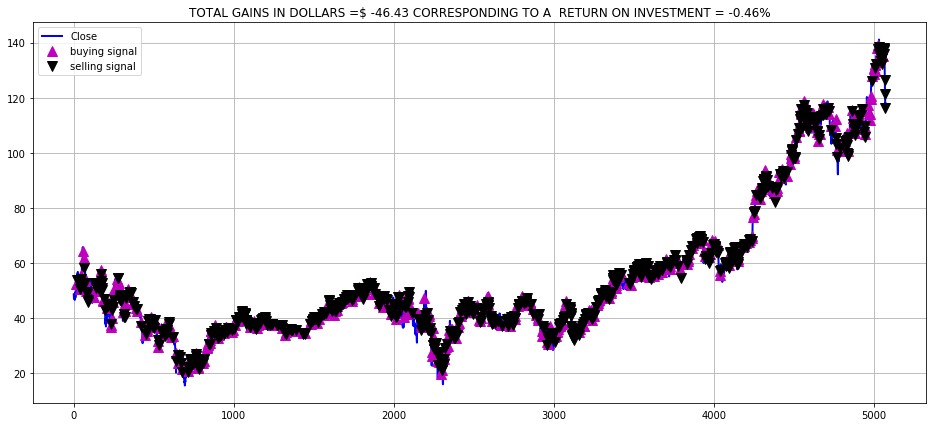

In [6]:
close = df['Close']
fig = plt.figure(figsize = (16,7))
plt.plot(close, color='b', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('TOTAL GAINS IN DOLLARS =$ %.2f CORRESPONDING TO A  RETURN ON INVESTMENT = %.2f%%'%(total_gains, invest))
plt.grid()
plt.legend()
plt.savefig('output/'+name+'.png')
plt.show()

## 5. DOUBLE Q-LEARNING AGENT

The reader will benefit from consulting the following two sources:

https://towardsdatascience.com/double-deep-q-networks-905dd8325412

https://arxiv.org/pdf/1509.06461.pdf


Because the future maximum approximated action value in Q-learning is evaluated using the same Q function as in current action selection policy, in noisy environments Q-learning can sometimes overestimate the action values, slowing the learning. A variant called Double Q-learning was proposed to correct this. Double Q-learning is an off-policy reinforcement learning algorithm, where a different policy is used for value evaluation than what is used to select the next action.

In practice, two separate value functions are trained in a mutually symmetric fashion using separate experiences,

$Q^{A}$ and $ Q^{B}$. The double Q-learning update step is then as follows:



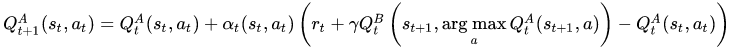

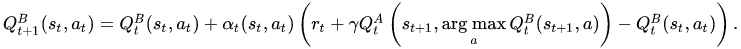

Now the estimated value of the discounted future is evaluated using a different policy, which solves the overestimation issue.

This algorithm was later modified in 2015 and combined with deep learning, as in the DQN algorithm, resulting in Double DQN, which outperforms the original DQN algorithm.

In [7]:
## Double Q-learning agent

from collections import deque
import random

df= df_full.copy()
name = 'Double Q-learning agent'

class Model:
    def __init__(self, input_size, output_size, layer_size, learning_rate):
        self.X = tf.placeholder(tf.float32, (None, input_size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        feed_forward = tf.layers.dense(self.X, layer_size, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, output_size)
        self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(self.cost)
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 500
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    COPY = 1000
    T_COPY = 0
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.model = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.model_negative = Model(self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
        self.trainable = tf.trainable_variables()
    
    def _assign(self):
        for i in range(len(self.trainable)//2):
            assign_op = self.trainable[i+len(self.trainable)//2].assign(self.trainable[i])
            self.sess.run(assign_op)

    def _memorize(self, state, action, reward, new_state, done):
        self.MEMORIES.append((state, action, reward, new_state, done))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            action = self.get_predicted_action([state])
        return action

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        Q = self.predict(states)
        Q_new = self.predict(new_states)
        Q_new_negative = self.sess.run(self.model_negative.logits, feed_dict={self.model_negative.X:new_states})
        replay_size = len(replay)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, done_r = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not done_r:
                target[action_r] += self.GAMMA * Q_new_negative[i, np.argmax(Q_new[i])]
            X[i] = state_r
            Y[i] = target
        return X, Y

    def predict(self, inputs):
        return self.sess.run(self.model.logits, feed_dict={self.model.X:inputs})
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign()
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                state = next_state
                X, Y = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.model.cost, self.model.optimizer], 
                                        feed_dict={self.model.X: X, self.model.Y:Y})
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)



D:\Program Files\Anaconda\lib\site-packages\tensorflow_core\python\client\session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 10, total rewards: 980.929652.3, cost: 0.116983, total money: 10980.929652
epoch: 20, total rewards: 106.649886.3, cost: 0.050128, total money: 9420.169875
epoch: 30, total rewards: 288.560475.3, cost: 0.012792, total money: 10161.920476
epoch: 40, total rewards: 33.261663.3, cost: 0.023108, total money: 9790.511663
epoch: 50, total rewards: 3.898372.3, cost: 0.008146, total money: 10003.898372
epoch: 60, total rewards: -247.230938.3, cost: 0.003083, total money: 9358.159061
epoch: 70, total rewards: 67.365456.3, cost: 0.008083, total money: 10067.365456
epoch: 80, total rewards: 119.973616.3, cost: 0.032573, total money: 10119.973616
epoch: 90, total rewards: 59.213842.3, cost: 0.003554, total money: 10059.213842
epoch: 100, total rewards: -72.814166.3, cost: 0.001719, total money: 9558.175832
epoch: 110, total rewards: 86.067441.3, cost: 0.001353, total money: 9848.587438
epoch: 120, total rewards: -31.844588.3, cost: 0.000522, total money: 9968.155412
epoch: 130, total reward

day 1036: buy 1 unit at price 40.820000, total balance 9934.117479
day 1037: buy 1 unit at price 40.570000, total balance 9893.547480
day 1038, sell 1 unit at price 40.310001, investment -1.249383 %, total balance 9933.857481,
day 1039, sell 1 unit at price 40.200001, investment -0.912001 %, total balance 9974.057482,
day 1040: buy 1 unit at price 40.349998, total balance 9933.707483
day 1041, sell 1 unit at price 40.560001, investment 0.520453 %, total balance 9974.267485,
day 1049: buy 1 unit at price 42.470001, total balance 9931.797483
day 1050, sell 1 unit at price 42.029999, investment -1.036031 %, total balance 9973.827482,
day 1051: buy 1 unit at price 41.310001, total balance 9932.517481
day 1052, sell 1 unit at price 41.520000, investment 0.508349 %, total balance 9974.037481,
day 1057: buy 1 unit at price 41.330002, total balance 9932.707479
day 1058, sell 1 unit at price 40.799999, investment -1.282368 %, total balance 9973.507479,
day 1059: buy 1 unit at price 40.980000, t

day 1974: buy 1 unit at price 42.610001, total balance 9929.247499
day 1975, sell 1 unit at price 42.310001, investment -0.704058 %, total balance 9971.557501,
day 1981: buy 1 unit at price 41.369999, total balance 9930.187502
day 1982, sell 1 unit at price 41.630001, investment 0.628480 %, total balance 9971.817503,
day 1988: buy 1 unit at price 43.650002, total balance 9928.167501
day 1989: buy 1 unit at price 45.619999, total balance 9882.547503
day 1990, sell 1 unit at price 45.209999, investment 3.573877 %, total balance 9927.757502,
day 1992, sell 1 unit at price 44.900002, investment -1.578250 %, total balance 9972.657503,
day 1995: buy 1 unit at price 47.419998, total balance 9925.237505
day 1996: buy 1 unit at price 45.939999, total balance 9879.297506
day 1997, sell 1 unit at price 46.150002, investment -2.678188 %, total balance 9925.447508,
day 1998: buy 1 unit at price 45.759998, total balance 9879.687510
day 1999: buy 1 unit at price 45.200001, total balance 9834.487509
d

day 2937, sell 1 unit at price 33.439999, investment -3.436334 %, total balance 9984.597509,
day 2943: buy 1 unit at price 32.799999, total balance 9951.797510
day 2944, sell 1 unit at price 33.810001, investment 3.079275 %, total balance 9985.607512,
day 2958: buy 1 unit at price 30.840000, total balance 9954.767511
day 2959, sell 1 unit at price 32.380001, investment 4.993518 %, total balance 9987.147512,
day 2962: buy 1 unit at price 32.299999, total balance 9954.847513
day 2963: buy 1 unit at price 33.200001, total balance 9921.647512
day 2964, sell 1 unit at price 31.600000, investment -2.167179 %, total balance 9953.247513,
day 2965, sell 1 unit at price 31.889999, investment -3.945787 %, total balance 9985.137512,
day 2966: buy 1 unit at price 31.040001, total balance 9954.097511
day 2967, sell 1 unit at price 32.869999, investment 5.895612 %, total balance 9986.967510,
day 2969: buy 1 unit at price 33.130001, total balance 9953.837509
day 2970, sell 1 unit at price 33.419998, i

day 3832: buy 1 unit at price 60.959999, total balance 9925.797499
day 3834, sell 1 unit at price 59.950001, investment -1.656821 %, total balance 9985.747499,
day 3837: buy 1 unit at price 60.849998, total balance 9924.897501
day 3838, sell 1 unit at price 61.049999, investment 0.328678 %, total balance 9985.947500,
day 3841: buy 1 unit at price 62.070000, total balance 9923.877501
day 3842, sell 1 unit at price 63.040001, investment 1.562754 %, total balance 9986.917501,
day 3846: buy 1 unit at price 63.240002, total balance 9923.677500
day 3848, sell 1 unit at price 62.939999, investment -0.474388 %, total balance 9986.617498,
day 3872: buy 1 unit at price 66.470001, total balance 9920.147497
day 3873: buy 1 unit at price 66.199997, total balance 9853.947500
day 3874, sell 1 unit at price 65.779999, investment -1.038066 %, total balance 9919.727499,
day 3875: buy 1 unit at price 66.080002, total balance 9853.647497
day 3876: buy 1 unit at price 66.019997, total balance 9787.627501
d

day 4712, sell 1 unit at price 116.389999, investment -1.238862 %, total balance 9894.347429,
day 4713: buy 1 unit at price 115.019997, total balance 9779.327433
day 4714, sell 1 unit at price 114.519997, investment -1.884857 %, total balance 9893.847429,
day 4715, sell 1 unit at price 112.839996, investment -1.895323 %, total balance 10006.687426,
day 4734: buy 1 unit at price 104.860001, total balance 9901.827425
day 4735, sell 1 unit at price 103.419998, investment -1.373262 %, total balance 10005.247423,
day 4741: buy 1 unit at price 109.089996, total balance 9896.157427
day 4742, sell 1 unit at price 109.599998, investment 0.467506 %, total balance 10005.757425,
day 4754: buy 1 unit at price 106.650002, total balance 9899.107424
day 4755, sell 1 unit at price 109.260002, investment 2.447258 %, total balance 10008.367426,
day 4758: buy 1 unit at price 110.059998, total balance 9898.307428
day 4760, sell 1 unit at price 112.239998, investment 1.980738 %, total balance 10010.547426,


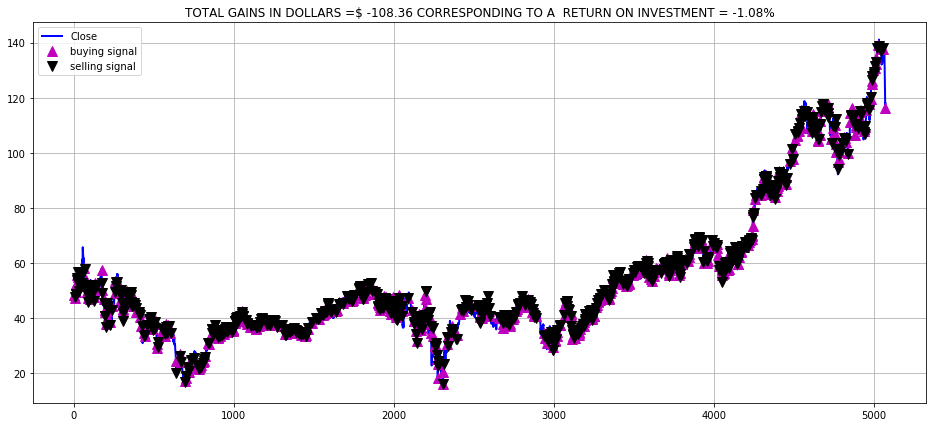

In [8]:
close = df['Close']
fig = plt.figure(figsize = (16,7))
plt.plot(close, color='b', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('TOTAL GAINS IN DOLLARS =$ %.2f CORRESPONDING TO A  RETURN ON INVESTMENT = %.2f%%'%(total_gains, invest))
plt.grid()
plt.legend()
plt.savefig('output/'+name+'.png')
plt.show()

## 6. RECURRENT Q-LEARNING AGENT

It has been found that the architecture of the plain vanilla Q-Networks is not properly suited to deal with partially observable environments.

For this reason, recurrent layers have been added to the Deep Q-Networks in order to allow them to handle past dependencies.  An interesting application can be found in a paper by **Romac, C and V. Beraud (2019). `Deep Recurrent Q-Learning vs. Deep Q-Learnin on a simple Partially Observable Markov Decision Process with Minecraft`.**

The reference is to be found at: http://hal.archives-ouvertes.fr/hal-02062157v2/document

In [1]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [ ]:
restartkernel()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()
df_full.to_csv('JPM.csv',index=False)


D:\Program Files\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [3]:
## Recurrent Q-learning agent

from collections import deque
import random

df= df_full.copy()
name = 'Recurrent Q-learning agent'
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.X = tf.placeholder(tf.float32, (None, None, self.state_size))
        self.Y = tf.placeholder(tf.float32, (None, self.OUTPUT_SIZE))
        cell = tf.nn.rnn_cell.LSTMCell(self.LAYER_SIZE, state_is_tuple = False)
        self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * self.LAYER_SIZE))
        self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
        self.logits = tf.layers.dense(self.rnn[:,-1], self.OUTPUT_SIZE)
        self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.logits, feed_dict={self.X:states, self.hidden_layer:init_values})
        Q_new = self.sess.run(self.logits, feed_dict={self.X:new_states, self.hidden_layer:init_values})
        replay_size = len(replay)
        X = np.empty((replay_size, 4, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        INIT_VAL = np.empty((replay_size, 2 * self.LAYER_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, dead_r, rnn_memory = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not dead_r:
                target[action_r] += self.GAMMA * np.amax(Q_new[i])
            X[i] = state_r
            Y[i] = target
            INIT_VAL[i] = rnn_memory
        return X, Y, INIT_VAL
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            action, last_state = self.sess.run([self.logits,self.last_state],
                                                feed_dict={self.X:[self.INITIAL_FEATURES],
                                                            self.hidden_layer:init_value})
            action, init_value = np.argmax(action[0]), last_state
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.logits,
                                                  self.last_state],
                                                  feed_dict={self.X:[self.INITIAL_FEATURES],
                                                             self.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                    
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                self.INITIAL_FEATURES = new_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                X, Y, INIT_VAL = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.cost, self.optimizer], 
                                        feed_dict={self.X: X, self.Y:Y,
                                                  self.hidden_layer: INIT_VAL})
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
                
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)


Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [4]:
agent.train(iterations = 100, checkpoint = 10, initial_money = initial_money)


epoch: 10, total rewards: -10.960045.3, cost: 0.000654, total money: 9308.279945
epoch: 20, total rewards: 134.870094.3, cost: 0.002483, total money: 9204.040085
epoch: 30, total rewards: 199.540016.3, cost: 0.063796, total money: 8186.510025
epoch: 40, total rewards: 89.230026.3, cost: 0.036484, total money: 9272.760025
epoch: 50, total rewards: -91.000008.3, cost: 0.011961, total money: 9253.809975
epoch: 60, total rewards: 202.500053.3, cost: 0.054367, total money: 9651.420052
epoch: 70, total rewards: -39.809982.3, cost: 0.036860, total money: 9409.240005
epoch: 80, total rewards: -97.449966.3, cost: 0.034250, total money: 9786.440033
epoch: 90, total rewards: 829.260010.3, cost: 0.083493, total money: 7736.660057
epoch: 100, total rewards: 41.079941.3, cost: 0.053808, total money: 9412.819931


In [7]:

states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 1: buy 1 unit at price 108.059998, total balance 9891.940002
day 2: buy 1 unit at price 109.040001, total balance 9782.900002
day 3: buy 1 unit at price 108.339996, total balance 9674.560005
day 4: buy 1 unit at price 108.500000, total balance 9566.060005
day 5: buy 1 unit at price 109.050003, total balance 9457.010002
day 6: buy 1 unit at price 110.250000, total balance 9346.760002
day 7: buy 1 unit at price 110.839996, total balance 9235.920006
day 8: buy 1 unit at price 112.669998, total balance 9123.250008
day 9: buy 1 unit at price 112.269997, total balance 9010.980011
day 10: buy 1 unit at price 112.989998, total balance 8897.990013
day 11: buy 1 unit at price 113.260002, total balance 8784.730011
day 12: buy 1 unit at price 113.010002, total balance 8671.720009
day 13: buy 1 unit at price 114.330002, total balance 8557.390007
day 14: buy 1 unit at price 114.209999, total balance 8443.180008
day 15: buy 1 unit at price 115.669998, total balance 8327.510010
day 16: buy 1 unit 

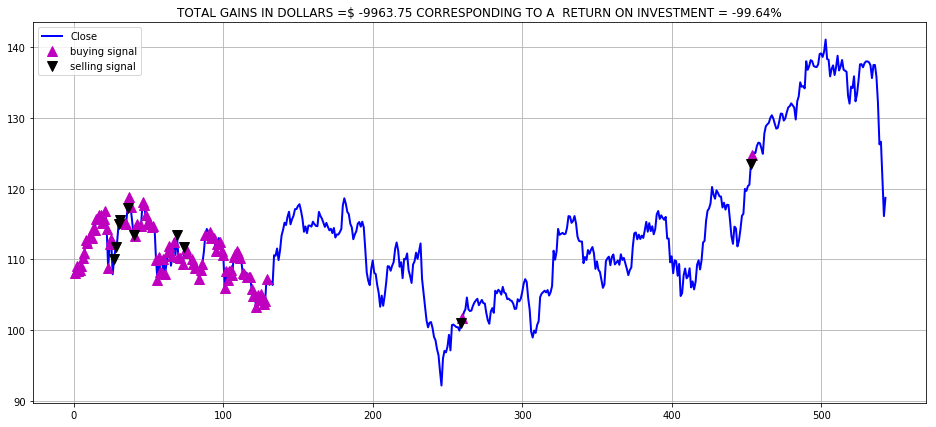

In [8]:
close = df['Close']
fig = plt.figure(figsize = (16,7))
plt.plot(close, color='b', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('TOTAL GAINS IN DOLLARS =$ %.2f CORRESPONDING TO A  RETURN ON INVESTMENT = %.2f%%'%(total_gains, invest))
plt.grid()
plt.legend()
plt.savefig('output/'+name+'.png')
plt.show()